#### About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind # TO CHECK FOR SIGNIFICANT DIFFERNCE BETWEEN THE MEANS OF TWO GROUPS
from scipy.stats import chi2_contingency # TO CHECK THE DIFFERENCES BETWEEN OBSERVED AND EXPECTED(IN TABLE FORMAT)
from scipy.stats import chisquare # TO CHECK THE DIFFERENCES BETWEEN OBSERVED AND EXPECTED
from statsmodels.graphics.gofplots import qqplot # QQ PLOT - TO CHECK FOR NORMALITY OF THE DISTRIBUTION
from scipy.stats import shapiro # TO CHECK FOR NORMALITY OF THE DISTRIBUTION
from scipy.stats import levene # TO CHECK FOR EQUALITY IN VARIANCE
from scipy.stats import kruskal # TO CHECK FOR SIGNIFICANT DIFFERENCE IN MEANS

LOADING FILES

In [2]:
file = pd.read_csv('bike_sharing.txt')

In [3]:
data = file.copy()

In [4]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


SHAPE OF DATA

In [5]:
data.shape

(10886, 12)

THERE ARE TOTAL 10886 ROWS AND 12 UNIQUE COLUMNS.

DATATYPES OF COLUMNS

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


DATATYPES CONVERSION

WE MAY OR MAY NOT CONVERT DATATYPES: 

NECESSITY OF DATATYPE CONVERSION IS NOT NEEDED AS ANALYSIS CAN BE DONE WITHOUT DOING SO.

BUT WE NEED EXTRA COLUMN SEASON_NAME FOR BETTER ANALYSIS.

In [7]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [8]:
season_mapping = {1:'spring',2:'summer',3:'fall',4:'winter'}
season_mapping

{1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

In [9]:
data['season_name'] = data['season'].map(season_mapping)

In [10]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring


DISTRIBUTION OF DATA  ALONG ALL COLUMNS

In [11]:
data.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,winter
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,NaN
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,NaN
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,NaN
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,NaN
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,NaN


CHECKING FOR NULL VALUES

In [12]:
data.isna().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
season_name    0
dtype: int64

#### THERE IS NO NULL VALUES IN THE DATA

UNIQUE VALUES AMONG COLUMNS

In [13]:
data.nunique(axis=0)

datetime       10886
season             4
holiday            2
workingday         2
weather            4
temp              49
atemp             60
humidity          89
windspeed         28
casual           309
registered       731
count            822
season_name        4
dtype: int64

### UNIVARIATE ANALYSIS

In [14]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter


#### FOR SEASON

<AxesSubplot:xlabel='season', ylabel='count'>

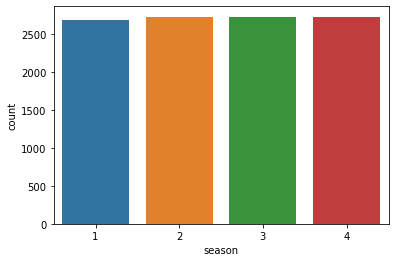

In [15]:
sns.countplot(data=data,x='season')

In [16]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

##### OBSERVATIONS :

ALL SEASON HAVE ALMOST EQUAL NUMBER OF DATA.

#### FOR HOLIDAY

<AxesSubplot:xlabel='holiday', ylabel='count'>

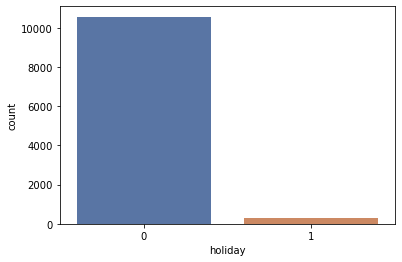

In [17]:
sns.countplot(data=data,x='holiday',palette='deep')

In [205]:
data['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

##### OBSERVATIONS :

PEOPLE USED THE RENTAL BIKES MORE IN NON HOLIDAY i.e. 97%. 

#### FOR WORKING DAY

<AxesSubplot:xlabel='workingday', ylabel='count'>

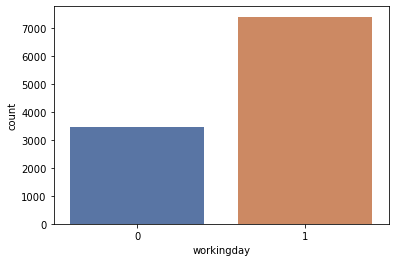

In [18]:
sns.countplot(data=data,x='workingday',palette='deep')

In [208]:
data['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

##### OBSERVATIONS :

PEOPLE PREFER THE RENTAL BIKES MORE IN WORKING-DAY i.e. 68%.

#### FOR WEATHER

<AxesSubplot:xlabel='weather', ylabel='count'>

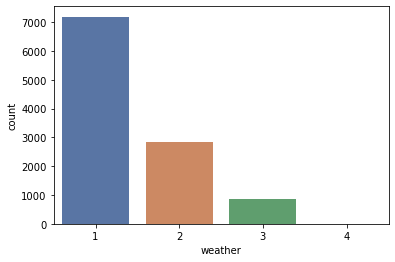

In [19]:
sns.countplot(data=data,x='weather',palette='deep')

In [209]:
data['weather'].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

##### OBSERVATIONS :

PEOPLE PREFER THE RENTAL BIKES MORE IN WEATHER 1(CLEAR SKY DAY) i.e. 66%.

#### MEAN TEMPERATURE IN DIFFERENT SEASONS

In [20]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring


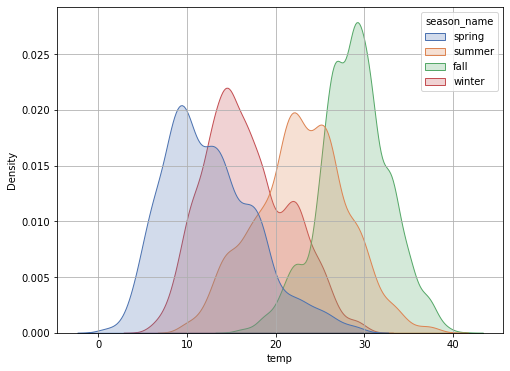

In [21]:
plt.figure(figsize=(8,6))
sns.kdeplot(data=data,x='temp',hue='season_name',fill=True,palette='deep')
plt.grid()
plt.show()

In [22]:
data.groupby('season_name')['temp'].mean()

season_name
fall      28.789111
spring    12.530491
summer    22.823483
winter    16.649239
Name: temp, dtype: float64

##### OBSERVATIONS :

SURPRISINGLY FROM VISUALS AND DATA, WE CAN SEE MINIMUM TEMPERATURE(12.53) IS IN SPRING AND MAXIMUM TEMPERATURE(28.78) IS IN FALL.

#### MEAN HUMIDITY IN DIFFERENT SEASONS

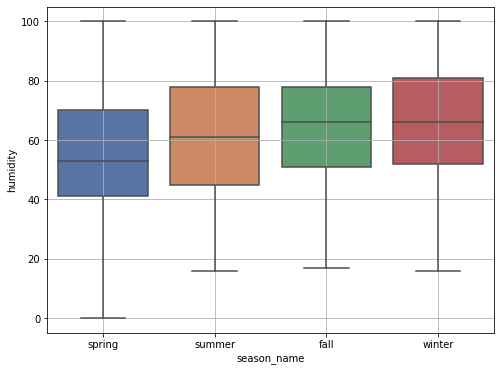

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,y='humidity',x='season_name',palette='deep')
plt.grid()
plt.show()

##### OBSERVATIONS :

LOWEST HUMIDITY IS IN SPRING SEASON, FALL AND WINTER HAVE ALMOST EQUAL MEAN HUMIDITY.

#### MEAN WINDSPEED IN DIFFERENT SEASONS

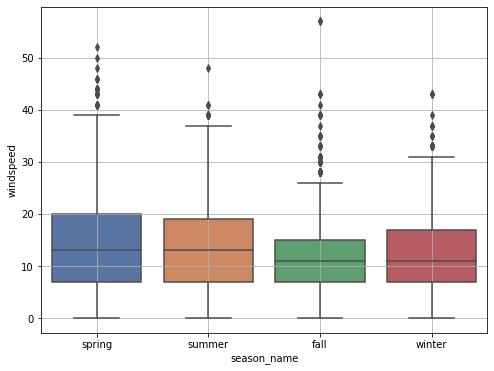

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data,y='windspeed',x='season_name',palette='deep')
plt.grid()
plt.show()

##### OBSERVATIONS :

1. WINDSPEED FOR ALL SEASON IS NEARLY EQUAL.

2. VARIANCE OF WINDSPEED IS MORE IN SPRING SEASON.

3. THERE IS ONE OUTLIER IN FALL SEASON WHICH SHOWS MAXIMUM VALUE. 

### BIVARIATE ANALYSIS

#### FOR CASUAL,REGISTERED RIDERS ON SEASONS

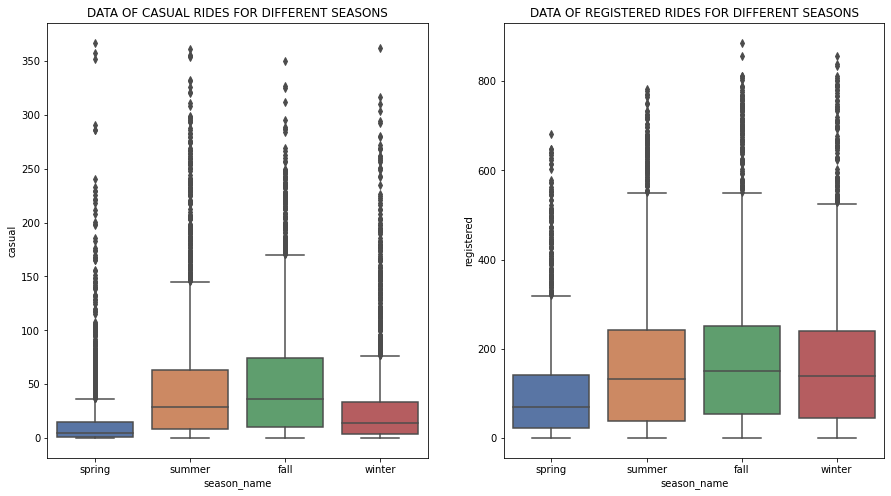

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.boxplot(data=data,y='casual',x='season_name',palette='deep',ax=axes[0]).set_title("DATA OF CASUAL RIDES FOR DIFFERENT SEASONS")
sns.boxplot(data=data,y='registered',x='season_name',palette='deep',ax=axes[1]).set_title("DATA OF REGISTERED RIDES FOR DIFFERENT SEASONS")
plt.show()

##### OBSERVATIONS :

FROM THE ABOVE GRAPH WE CAN CONFIRM THAT :

1. MORE PEOPLE HAVE TAKEN THE RIDE IN REGISTERED CATEGORY AND ITS VARIANCE IS ALSO LARGE WHEN COMPARED WITH CASUAL RIDERS.
2. OUTLIERS IN CASUAL RIDES ARE MORE THAN REGISTERED RIDES (PERCENTAGE WISE).

#### FOR CASUAL,REGISTERED RIDERS ON HOLIDAY

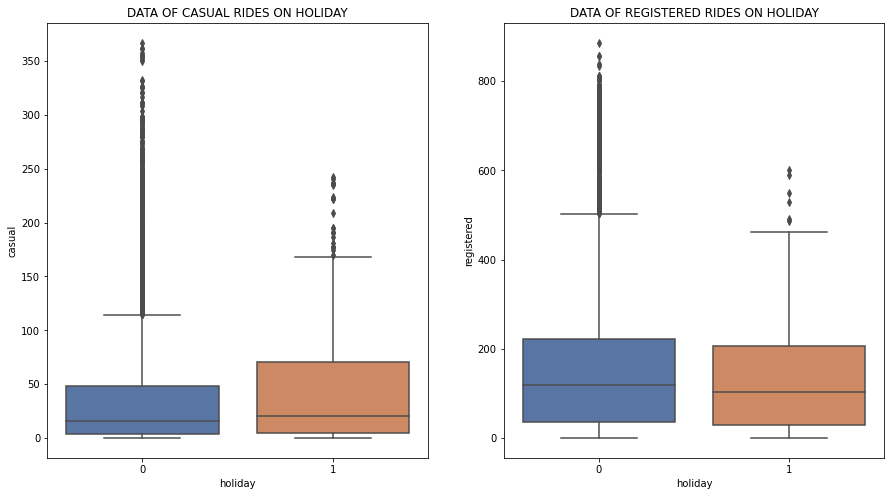

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.boxplot(data=data,y='casual',x='holiday',palette='deep',ax=axes[0]).set_title("DATA OF CASUAL RIDES ON HOLIDAY")
sns.boxplot(data=data,y='registered',x='holiday',palette='deep',ax=axes[1]).set_title("DATA OF REGISTERED RIDES ON HOLIDAY")
plt.show()

##### OBSERVATIONS :

1. MEAN VALUES FOR REGISTERED RIDES ON HOLIDAYS ARE MORE THAN CASUAL RIDES.
2. MEAN VALUES FOR REGISTERED RIDES ON NON-HOLIDAYS ARE ALSO MORE THAN CASUAL RIDES.


1. MEAN AND VARIANCE FOR CASUAL RIDES ARE MORE ON HOLIDAYS THAN ON NON-HOLIDAYS.
2. MEAN AND VARIANCE FOR REGISTERED RIDES ARE MORE ON NON-HOLIDAYS THAN ON HOLIDAYS.


1. FOR CASUAL RIDERS, PEOPLE PREFER TO TAKE RIDES ON HOLIDAYS.
2. FOR REGISTERED RIDERS, PEOPLE PREFER TO TAKE RIDES ON NON-HOLIDAYS. THIS MAYBE BECAUSE PEOPLE WOULD BE USING THEM TO GO TO THEIR OFFICES.
3. OUTLIERS ON NON-HOLIDAY FOR CASUAL RIDES ARE FAR MORE THAN FOR REGISTERED RIDES STATING PEOPLE MIGHT USE THEM IN EMERGENCY. 

#### FOR CASUAL,REGISTERED RIDERS ON WORKING DAY

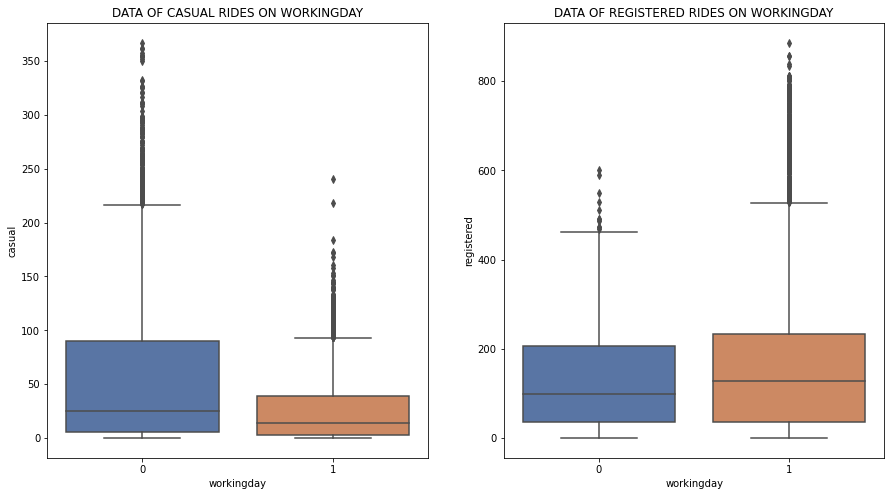

In [27]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.boxplot(data=data,y='casual',x='workingday',palette='deep',ax=axes[0]).set_title("DATA OF CASUAL RIDES ON WORKINGDAY")
sns.boxplot(data=data,y='registered',x='workingday',palette='deep',ax=axes[1]).set_title("DATA OF REGISTERED RIDES ON WORKINGDAY")
plt.show()

##### OBSERVATIONS :

FROM ABOVE VISUALS WE CAN CONFIRM THAT :


1. REGISTERED USERS ARE MORE THAN CASUAL USERS.


1. REGISTERED USERS TAKES THE RIDES MORE ON WORKING DAYS, MAYBE BECAUSE THEY USE THEM IN THEIR DAY TO DAY WORK. 
2. CASUAL USERS TAKES THE RIDES MORE ON NON-WORKING DAYS, MAYBE BECAUSE THEY USE THEM TO TRY OR FOR ENJOYMENT PURPOSE.

#### FOR CASUAL,REGISTERED RIDERS ON WEATHERS

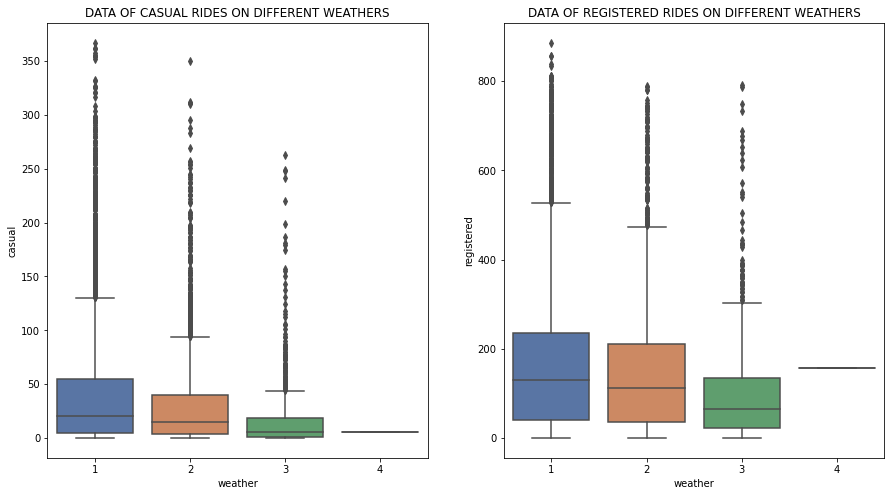

In [28]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.boxplot(data=data,y='casual',x='weather',palette='deep',ax=axes[0]).set_title("DATA OF CASUAL RIDES ON DIFFERENT WEATHERS")
sns.boxplot(data=data,y='registered',x='weather',palette='deep',ax=axes[1]).set_title("DATA OF REGISTERED RIDES ON DIFFERENT WEATHERS")
plt.show()

##### OBSERVATIONS :

FROM ABOVE VISUALS WE CAN CONFIRM THAT :

1. REGISTERED USERS ARE MORE THAN CASUAL USERS IN ALL WEATHERS.
2. AS THE WEATHER GOES ROUGH/VERY BAD, PEOPLE TENDS TO TAKE LESS RIDES AND VICE VERSA.
3. WEATHER PLAYS VERY IMPORTANT ROLE FOR INCREASING OR DECREASING THE RIDE COUNTS.


#### FOR ONLY CASUAL RIDERS (COUNT) PER SEASON / HOLIDAY / WORKING DAY / WEATHER

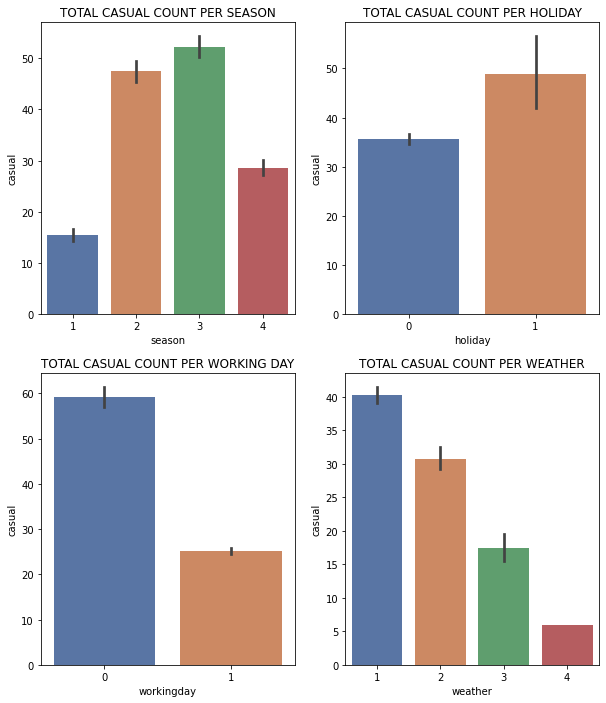

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.subplots_adjust(top=1.4)

sns.barplot(data=data,x='season',y='casual',palette='deep',ax=axes[0,0]).set_title("TOTAL CASUAL COUNT PER SEASON")
sns.barplot(data=data,x='holiday',y='casual',palette='deep',ax=axes[0,1]).set_title("TOTAL CASUAL COUNT PER HOLIDAY")
sns.barplot(data=data,x='workingday',y='casual',palette='deep',ax=axes[1,0]).set_title("TOTAL CASUAL COUNT PER WORKING DAY")
sns.barplot(data=data,x='weather',y='casual',palette='deep',ax=axes[1,1]).set_title("TOTAL CASUAL COUNT PER WEATHER")

plt.show()

##### OBSERVATIONS :
#### CASUAL RIDES
WITH RESPECT TO SEASON :
- SEASON 3 HAS THE MOST NUMBER OF CASUAL RIDES.
- SEASON 1 HAS THE MOST NUMBER OF CASUAL RIDES.

WITH RESPECT TO HOLIDAY :
- TOTAL NUMBER OF RIDES IS MORE IN HOLIDAYS AS COMPARED TO NON-HOLIDAYS.

WITH RESPECT TO WORKING DAYS :
- TOTAL NUMBER OF RIDES IS MORE IN NON-WORKING DAYS AS COMPARED TO WORKING DAYS.

WITH RESPECT TO WEATHER :
- WEATHER 1 (CLEAR SKY) HAS THE MAXIMUM NUMBER OF RIDES COUNT.
- WEATHER 4 (Heavy Rain + Thunderstorm + Mist, Snow + Fog) HAS THE LEAST NUMBER OF RIDES COUNT.

#### FOR ONLY REGISTERED RIDERS PER SEASON / HOLIDAY / WORKING DAY / WEATHER

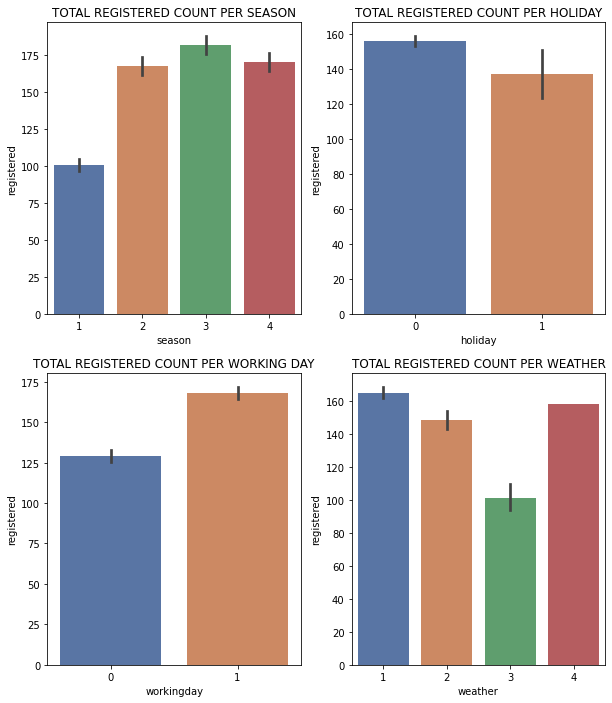

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.subplots_adjust(top=1.4)

sns.barplot(data=data,x='season',y='registered',palette='deep',ax=axes[0,0]).set_title("TOTAL REGISTERED COUNT PER SEASON")
sns.barplot(data=data,x='holiday',y='registered',palette='deep',ax=axes[0,1]).set_title("TOTAL REGISTERED COUNT PER HOLIDAY")
sns.barplot(data=data,x='workingday',y='registered',palette='deep',ax=axes[1,0]).set_title("TOTAL REGISTERED COUNT PER WORKING DAY")
sns.barplot(data=data,x='weather',y='registered',palette='deep',ax=axes[1,1]).set_title("TOTAL REGISTERED COUNT PER WEATHER")

plt.show()

##### OBSERVATIONS:

#### REGISTERED RIDES
WITH RESPECT TO SEASON :
- SEASON 3 HAS THE MOST NUMBER OF CASUAL RIDES.
- SEASON 1 HAS THE MOST NUMBER OF CASUAL RIDES.

WITH RESPECT TO HOLIDAY :
- TOTAL NUMBER OF RIDES IS MORE IN NON-HOLIDAYS AS COMPARED TO HOLIDAYS.

WITH RESPECT TO WORKING DAYS :
- TOTAL NUMBER OF RIDES IS MORE IN WORKING DAYS AS COMPARED TO NON-WORKING DAYS.

WITH RESPECT TO WEATHER :
- WEATHER 1 (CLEAR SKY) HAS THE MAXIMUM NUMBER OF RIDES COUNT.
- WEATHER 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) HAS THE LEAST NUMBER OF   RIDES COUNT.

#### FOR OVERALL RIDERS(TOTAL COUNT) PER SEASON / HOLIDAY / WORKING DAY / WEATHER¶

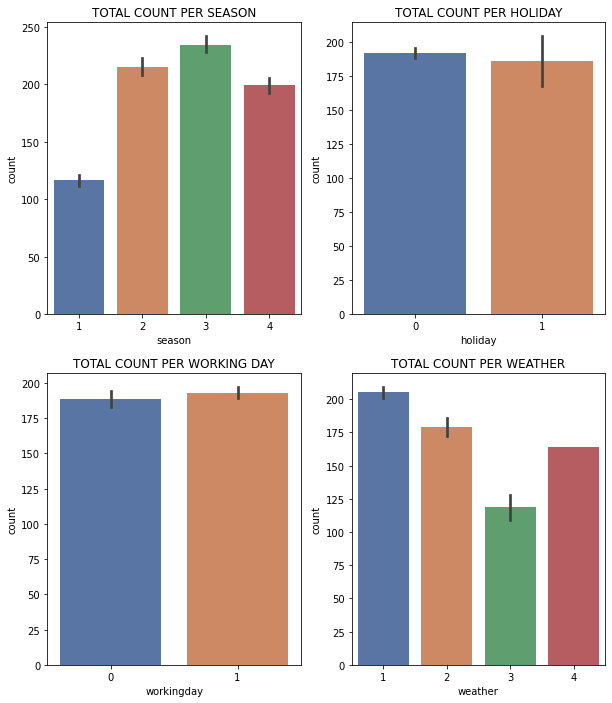

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.subplots_adjust(top=1.4)

sns.barplot(data=data,x='season',y='count',palette='deep',ax=axes[0,0]).set_title("TOTAL COUNT PER SEASON")
sns.barplot(data=data,x='holiday',y='count',palette='deep',ax=axes[0,1]).set_title("TOTAL COUNT PER HOLIDAY")
sns.barplot(data=data,x='workingday',y='count',palette='deep',ax=axes[1,0]).set_title("TOTAL COUNT PER WORKING DAY")
sns.barplot(data=data,x='weather',y='count',palette='deep',ax=axes[1,1]).set_title("TOTAL COUNT PER WEATHER")

plt.show()

##### OBSERVATIONS :

#### TOTAL RIDES
WITH RESPECT TO SEASON :
- SEASON 3 HAS THE MOST NUMBER OF CASUAL RIDES.
- SEASON 1 HAS THE MOST NUMBER OF CASUAL RIDES.

WITH RESPECT TO HOLIDAY :
- TOTAL NUMBER OF RIDES IS MORE IN NON-HOLIDAYS AS COMPARED TO NON-HOLIDAYS BUT THE DIFFERENCE IS LOW.

WITH RESPECT TO WORKING DAYS :
- TOTAL NUMBER OF RIDES IS MORE IN WORKING DAYS AS COMPARED TO NON-WORKING DAYS BUT THE DIFFERENCE IS VERY LOW.

WITH RESPECT TO WEATHER :
- WEATHER 1 (CLEAR SKY) HAS THE MAXIMUM NUMBER OF RIDES COUNT.
- WEATHER 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) HAS THE LEAST NUMBER OF   RIDES COUNT.

#### SEASON AND RIDES

In [32]:
weathe_season_crosstab = pd.crosstab(data['weather'],data['season_name'])
weathe_season_crosstab

season_name,fall,spring,summer,winter
weather,,,,
1,1930,1759,1801,1702
2,604,715,708,807
3,199,211,224,225
4,0,1,0,0


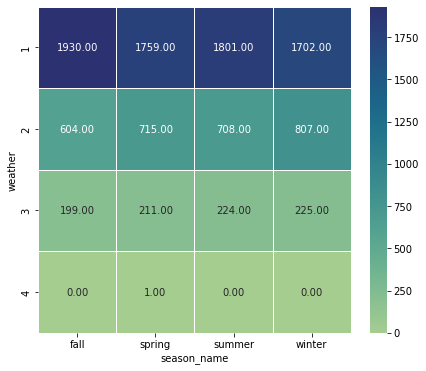

In [33]:
plt.figure(figsize=(7,6))
sns.heatmap(weathe_season_crosstab,annot=True,cmap='crest',linewidths=(0.5),fmt='.2f')
plt.show()

##### OBSERVATIONS :

1. FROM THE ABOVE VISUALS WE CAN SEE THAT PEOPLE USE RENTAL BIKES MORE WHEN ENVIRONMENT IS GOOD.
2. PEOPLE USED THE BIKES MOST WHEN WEATHER WAS CLEAR AND IN FALL SEASON.
3. USAGE OF IT GRADUALLY DECREASES AS THE WEATHER GOES ROUGH. 

### HYPOTHESIS TESTING

In [34]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter


### I. TEST TO CHECK WHETHER WORKING DAY HAS AN EFFECT ON NUMBER OF ELECTRIC CYCLES RENTED.

##### HOLIDAY AND COUNT

In [35]:
a = data[data['holiday']==1]['count']
b = data[data['holiday']==0]['count']

In [36]:
# H0 : COUNT FOR RIDES ARE SAME IN HOLIDAY / HOLIDAY AND RIDE-COUNT ARE INDEPENDENT
# HA : COUNT FOR RIDES ARE DIFFERENT IN HOLIDAY / HOLIDAY AND RIDE-COUNT ARE NOT INDEPENDENT

alpha = 0.05

t_stat,p_value =  ttest_ind(a,b,alternative='two-sided')
print(f"t_stat : {t_stat}, p_value : {p_value}")

t_stat : -0.5626388963477119, p_value : 0.5736923883271103


In [37]:
if p_value < alpha:
    print(f"Since p_value {p_value} which is less than alpha {alpha}, reject null hypothesis.\nTherefore, COUNT FOR RIDES ARE DIFFERENT IN HOLIDAY / HOLIDAY AND RIDE-COUNT ARE NOT INDEPENDENT.\nIT COULD BECOME A GOOD PREDICTIVE MODEL.")
    
else:
    print(f"Since p_value {p_value} which is greater than alpha {alpha} , accept null hypothesis. \nTherefore, COUNT FOR RIDES ARE SAME IN HOLIDAY / HOLIDAY AND RIDE-COUNT ARE INDEPENDENT.\nIT CAN NOT BECOME A GOOD PREDICTIVE MODEL.")

Since p_value 0.5736923883271103 which is greater than alpha 0.05 , accept null hypothesis. 
Therefore, COUNT FOR RIDES ARE SAME IN HOLIDAY / HOLIDAY AND RIDE-COUNT ARE INDEPENDENT.
IT CAN NOT BECOME A GOOD PREDICTIVE MODEL.


#### CONCLUSION : SO FROM ABOVE T-TEST WE CAN CONCLUDE THAT  HOLIDAY HAS NO EFFECT ON NUMBER OF ELECTRIC CYCLESS RENTED.

##### WORKING-DAY AND COUNT

In [38]:
working_zero = data[data['workingday']==0]['count']
working_one = data[data['workingday']==1]['count']

In [39]:
# H0 : COUNT FOR RIDES ARE SAME IN WORKING DAYS / HWORKING DAYS AND RIDE-COUNT ARE INDEPENDENT
# HA : COUNT FOR RIDES ARE DIFFERENT IN WORKING DAYS / WORKING DAYS AND RIDE-COUNT ARE NOT INDEPENDENT

alpha = 0.05

t_stat,p_value =  ttest_ind(working_zero,working_one,alternative='two-sided')
print(f"t_stat : {t_stat}, p_value : {p_value}")

t_stat : -1.2096277376026694, p_value : 0.22644804226361348


In [40]:
if p_value < alpha:
    print(f"Since p_value {p_value} which is less than alpha {alpha}, reject null hypothesis.\nTherefore, COUNT FOR RIDES ARE DIFFERENT IN WORKING-DAY / WORKING-DAY AND RIDE-COUNT ARE DEPENDENT.\nIT COULD BECOME A GOOD PREDICTIVE MODEL.")
    
else:
    print(f"Since p_value {p_value} which is greater than alpha {alpha} , accept null hypothesis. \nTherefore, COUNT FOR RIDES ARE SAME IN WORKING-DAY / WORKING-DAY AND RIDE-COUNT ARE INDEPENDENT.\nIT CAN NOT BECOME A GOOD PREDICTIVE MODEL.")

Since p_value 0.22644804226361348 which is greater than alpha 0.05 , accept null hypothesis. 
Therefore, COUNT FOR RIDES ARE SAME IN WORKING-DAY / WORKING-DAY AND RIDE-COUNT ARE INDEPENDENT.
IT CAN NOT BECOME A GOOD PREDICTIVE MODEL.


#### CONCLUSION : SO FROM ABOVE T-TEST WE CAN CONCLUDE THAT WORKING DAY HAS NO EFFECT ON NUMBER OF ELECTRIC CYCLESS RENTED.

### II. TEST TO CHECK WHETHER NUMBER OF CYCLES RENTED SIMILAR OR DIFFERENT IN DIFFERENT SEASONS.

In [41]:
data.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring


In [172]:
data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

##### ASSUMPTIONS OF ANOVA:
- ALL GROUP HAVE NORMAL DISTRIBUTION - USE: QQ-PLOT OR SHAPIRO-WILK-TEST TO CHECK FOR NORMALITY
- ALL HAVE INDEPENDENT VARIABLE -
- ALL GROUP HAVE EQUAL VARIANCE - USE LEVENE-TEST TO CHECK FOR EQUALITY OF VARIANCE

In [42]:
season_one = data[data['season']==1]['count']
season_two = data[data['season']==2]['count']
season_three = data[data['season']==3]['count']
season_four = data[data['season']==4]['count']

ASSUMPTIONS :

1. CHECKING DISTRIBUTIONS OF DATA FOR DIFFERENT WEATHER

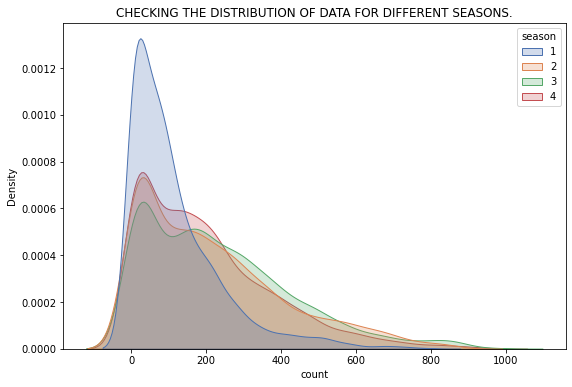

In [43]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=data,x='count',hue='season',fill=True,palette='deep',warn_singular=False).set_title('CHECKING THE DISTRIBUTION OF DATA FOR DIFFERENT SEASONS.')
plt.show()

FROM THE ABOVE VISUAL, IT IS CLEAR THAT DISTRIBUTION IS NOT NORMAL.

##### CHECKING THE NORMALITY OF DISTRIBUTION USING QQ PLOT

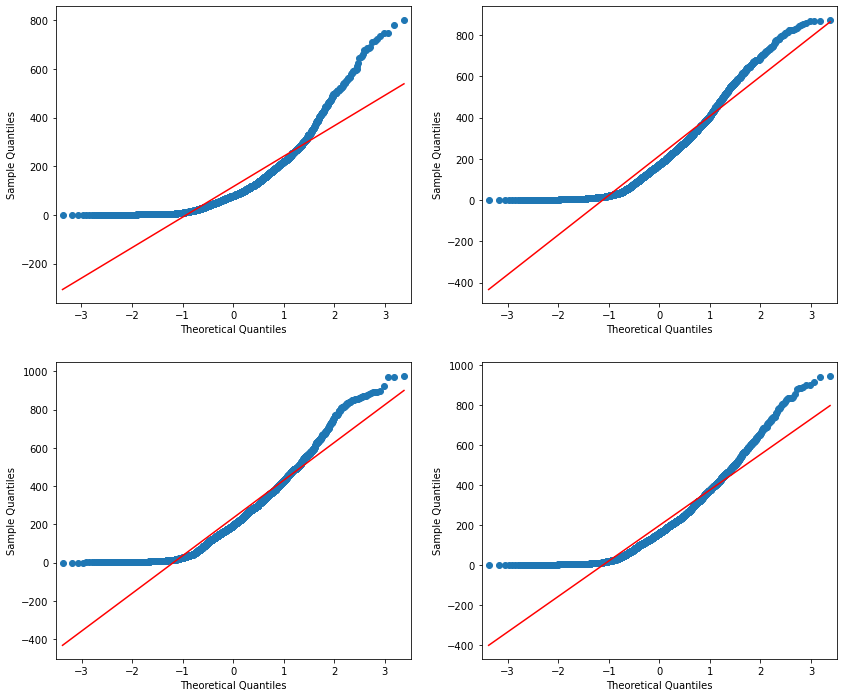

In [44]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,12))

qqplot(season_one,line='s',ax=axes[0,0])
qqplot(season_two,line='s',ax=axes[0,1])
qqplot(season_three,line='s',ax=axes[1,0])
qqplot(season_four,line='s',ax=axes[1,1])

plt.show()

FROM THE ABOVE PLOT ALSO, IT IS CLEAR THAT THE DISTRIBUTIONS ARE NOT NORMAL.

##### SHAPIRO TEST : TO CHECK FOR NORMALITY OF DISTRIBUTION

In [45]:
# H0 : IT IS NORMAL DISTRIBUTION
# HA : IT IS NOT A NORMAL DISTRIBUTION

seasons = [season_one,season_two,season_three,season_four]

alpha = 0.05

for i in seasons:
    print(shapiro(i.sample(150,replace=True)))

ShapiroResult(statistic=0.8195120096206665, pvalue=2.560495001788232e-12)
ShapiroResult(statistic=0.9088055491447449, pvalue=4.2889464424433754e-08)
ShapiroResult(statistic=0.9095678329467773, pvalue=4.764037697668755e-08)
ShapiroResult(statistic=0.9093152284622192, pvalue=4.6007851750573536e-08)


SO, FROM THE TEST WE CAN FINALLY CONCLUDE THAT THE DISTRIBUTION OF DATA FROM DIFFERENT CATEGORIES OF SEASON IS NOT NORMAL.

ASSUMPTIONS :

2. EQUALITY OF VARIANCE IN DIFFERENT GROUPS

In [46]:
# H0 : VARIANCE ARE SAME
# HA : VARIANCE ARE NOT SAME

alpha = 0.05

stats,pvalue = levene(season_one,season_two,season_three,season_four)
print(f"stats = {stats}\np_value = {pvalue}\nalpha = {alpha}")
print()
if pvalue < alpha:
    print(f"Since p_value is less than alpha, \nwe should reject null hypothesis and claim atleast one of the variance is different in the group.")
else :
    print(f"Since p_value is greater than alpha, \nwe should accept null hypothesis and claim variances are all same in the group.")

stats = 187.7706624026276
p_value = 1.0147116860043298e-118
alpha = 0.05

Since p_value is less than alpha, 
we should reject null hypothesis and claim atleast one of the variance is different in the group.


SO, FROM THE TEST WE CAN FINALLY CONCLUDE THAT THE DISTRIBUTION OF DATA FROM DIFFERENT CATEGORIES OF SEASON IS NOT NORMAL.

##### SINCE ASSUMPTIONS OF ANOVA FAILS, WE SHOULD NOW USE KRUSKAL TO TEST

In [47]:
# H0 : GROUPS HAVE SAME MEAN
# HA : GROUPS HAVE DIFFERENT MEAN

alpha = 0.05

stats,pvalue = kruskal(season_one,season_two,season_three,season_four)

print(f"stats = {stats} \np_value = {pvalue} \nalpha = {alpha}")
print()

if pvalue<alpha:
    print(f"Since p_value is less than alpha, \nwe should reject null hypothesis and claim groups have different mean.")
else :
    print(f"Since p_value is greater than alpha, \nwe should accept null hypothesis and claim groups have same mean.")

stats = 699.6668548181988 
p_value = 2.479008372608633e-151 
alpha = 0.05

Since p_value is less than alpha, 
we should reject null hypothesis and claim groups have different mean.


#### CONCLUSION :
#### SO FROM ABOVE KRUSKAL TEST IT IS CLEAR THAT GROUPS HAVE DIFFERENT MEAN THEREFORE 
#### WE CAN SAY THAT NUMBER OF CYCLES RENTED ARE DIFFERENT  IN DIFFERENT SEASONS.
#### AND IT CAN BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.

### III. TEST TO CHECK NUMBER OF CYCLES RENTED SIMILAR OR DIFFERENT IN DIFFERENT WEATHER.

In [48]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter


##### ASSUMPTIONS OF ANOVA:
- ALL GROUP HAVE NORMAL DISTRIBUTION - USE: QQ-PLOT OR SHAPIRO-WILK-TEST TO CHECK FOR NORMALITY
- ALL HAVE INDEPENDENT VARIABLE -
- ALL GROUP HAVE EQUAL VARIANCE - USE LEVENE-TEST TO CHECK FOR EQUALITY OF VARIANCE

In [49]:
data['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [50]:
weather_one = data[data['weather']==1]['count']
weather_two = data[data['weather']==2]['count']
weather_three = data[data['weather']==3]['count']
weather_four = data[data['weather']==4]['count']

ASSUMPTIONS :

1. CHECKING DISTRIBUTIONS OF DATA FOR DIFFERENT WEATHER

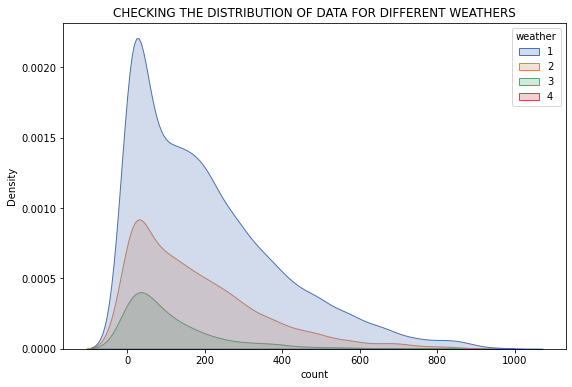

In [51]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=data,x='count',hue='weather',fill=True,palette='deep',warn_singular=False).set_title('CHECKING THE DISTRIBUTION OF DATA FOR DIFFERENT WEATHERS')
plt.show()

FROM VISUALS IT SEEMS DISTRIBUTIONS ARE NOT NORMAL.

##### CHECKING THE NORMALITY OF DISTRIBUTION USING QQ PLOT

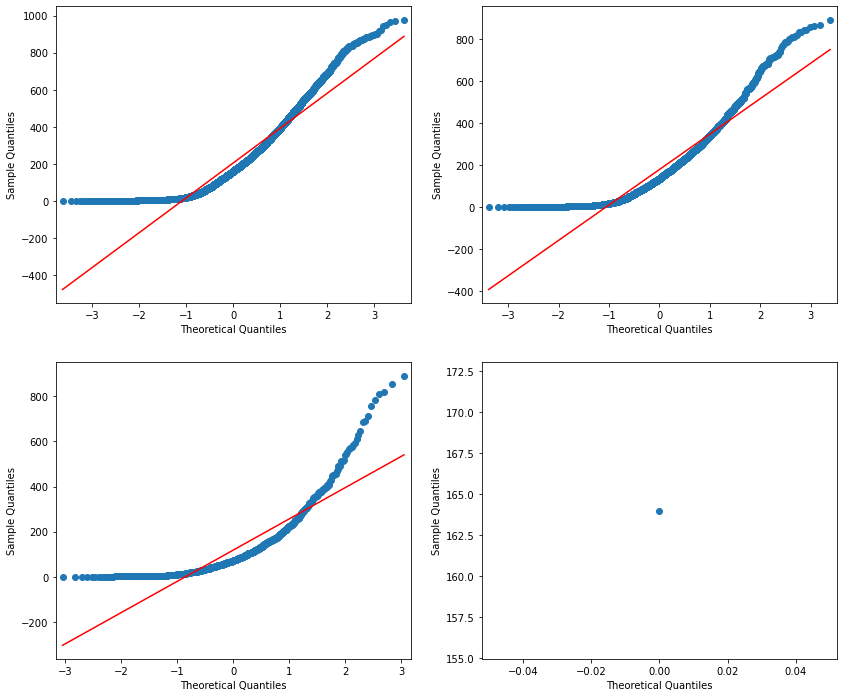

In [52]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(14,12))

qqplot(weather_one,line='s',ax=axes[0,0])
qqplot(weather_two,line='s',ax=axes[0,1])
qqplot(weather_three,line='s',ax=axes[1,0])
qqplot(weather_four,line='s',ax=axes[1,1])

plt.show()

FROM THE ABOVE PLOT IT SEEMS THE DISTRIBUTION OF THE DATA FROM EACH WEATHER IS NOT NORMAL.

##### SHAPIRO TEST : TO CHECK FOR NORMALITY OF DISTRIBUTION

In [53]:
# H0 : IT IS NORMAL DISTRIBUTION
# HA : IT IS NOT A NORMAL DISTRIBUTION

weather = [weather_one,weather_two,weather_three,weather_four]

alpha = 0.05

for i in weather:
    print(shapiro(i.sample(150,replace=True)))

ShapiroResult(statistic=0.8693434596061707, pvalue=3.420692062938713e-10)
ShapiroResult(statistic=0.8938223719596863, pvalue=6.011711572995182e-09)
ShapiroResult(statistic=0.7198878526687622, pvalue=1.4101420387757353e-15)
ShapiroResult(statistic=1.0, pvalue=1.0)


C:\Users\SOURABH\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


SO, FROM THE TEST WE CAN FINALLY CONCLUDE THAT THE DISTRIBUTION OF DATA FROM DIFFERENT CATEGORIES OF WEATHER IS NOT NORMAL.

ASSUMPTIONS :

2. EQUALITY OF VARIANCE IN DIFFERENT GROUPS

In [54]:
# H0 : VARIANCE ARE SAME
# HA : VARIANCE ARE NOT SAME

alpha = 0.05

stats,pvalue = levene(weather_one,weather_two,weather_three,weather_four)
print(f"stats = {stats}\np_value = {pvalue}\nalpha = {alpha}")
print()
if pvalue < alpha:
    print(f"Since p_value is less than alpha, \nwe should reject null hypothesis and claim atleast one of the variance is different in the group.")
else :
    print(f"Since p_value is greater than alpha, \nwe should accept null hypothesis and claim variances are all same in the group.")

stats = 54.85106195954556
p_value = 3.504937946833238e-35
alpha = 0.05

Since p_value is less than alpha, 
we should reject null hypothesis and claim atleast one of the variance is different in the group.


FROM TEST WE CAN CONCLUDE THAT ATLEAST ONE OF THE VARIANCE IS DIFFERENT IN THE GROUP.

##### SINCE ASSUMPTIONS OF ANOVA FAILS, WE SHOULD NOW USE KRUSKAL TO TEST

In [55]:
# H0 : GROUPS HAVE SAME MEAN
# HA : GROUPS HAVE DIFFERENT MEAN

alpha = 0.05

stats,pvalue = kruskal(weather_one,weather_two,weather_three,weather_four)

print(f"stats = {stats} \np_value = {pvalue} \nalpha = {alpha}")
print()

if pvalue<alpha:
    print(f"Since p_value is less than alpha, \nwe should reject null hypothesis and claim groups have different mean.")
else :
    print(f"Since p_value is greater than alpha, \nwe should accept null hypothesis and claim groups have same mean.")

stats = 205.00216514479087 
p_value = 3.501611300708679e-44 
alpha = 0.05

Since p_value is less than alpha, 
we should reject null hypothesis and claim groups have different mean.


#### CONCLUSION :
#### SO FROM ABOVE KRUSKAL TEST IT IS CLEAR THAT GROUPS HAVE DIFFERENT MEAN THEREFORE 
#### WE CAN SAY THAT NUMBER OF CYCLES RENTED ARE DIFFERENT  IN DIFFERENT WEATHER.
####  IT CAN BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.

### IV. IS WEATHER DEPENDENT ON SEASON ?

In [56]:
weathe_season_crosstab = pd.crosstab(data['weather'],data['season'])
weathe_season_crosstab

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [57]:
# H0 : SEASON AND WEATHER ARE INDEPENDENT OF EACH OTHER
# HA : SEASON AND WEATHER ARE DEPENDENT OF EACH OTHER

alpha = 0.05

stat,pvalue,dof,exp = chi2_contingency(weathe_season_crosstab)

print(f"fstat : {stat} \np_value : {pvalue}")
print()
if pvalue<alpha:
    print(f"Since p_value is less than alpha, \nwe should reject null hypothesis and claim that season and weather are dependet on each other.")
else :
    print(f"Since p_value is greater than alpha, \nwe should accept null hypothesis and claim that season and weather are not dependet on each other.")

fstat : 49.15865559689363 
p_value : 1.5499250736864862e-07

Since p_value is less than alpha, 
we should reject null hypothesis and claim that season and weather are dependet on each other.


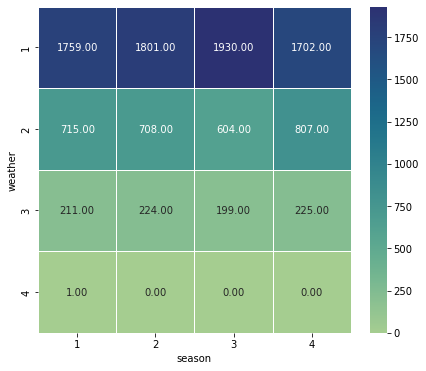

In [58]:
plt.figure(figsize=(7,6))
sns.heatmap(weathe_season_crosstab,annot=True,cmap='crest',linewidths=(0.5),fmt='.2f')
plt.show()

#### CONCLUSION :
#### FROM THE ABOVE CHI2_CONTINGENCY TEST, IT IS CLEAR THAT WEATHER AND SEASON ARE DEPENDENT ON EACH OTHER. 

####  IT CAN BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.

## INFERENCES :

1. REGISTERED PEOPLE TAKES THE RIDE MORE THAN CASUAL ONES, SO TRY TO RETAIN THOSE CUSTOMERS BY GIVING SOME ADDITIONAL BENEFITS.


2. PEOPLE ALSO TAKE MORE RIDES ON WORKINGDAYS AND NON-HOLIDAY, SO COMPANY CAN ALSO LOOK INTO THIS PART TO INCREASE THE REVENUE.


3. PEOPLE TAKE MORE RIDES ON WEATHER 1 (Clear, Few clouds, partly cloudy, partly cloudy) AND LEAST IN WEATHER 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog).


4. FOR REGISTERED RIDERS, PEOPLE PREFER TO TAKE RIDES ON NON-HOLIDAYS. THIS MAYBE BECAUSE PEOPLE WOULD BE USING THEM TO GO TO THEIR OFFICES. 


5. CASUAL USERS TAKES THE RIDES MORE ON NON-WORKING DAYS, MAYBE BECAUSE THEY USE THEM TO TRY OR FOR ENJOYMENT PURPOSES.


6. AS THE WEATHER GOES ROUGH/VERY BAD, PEOPLE TENDS TO TAKE LESS RIDES AND VICE VERSA.WEATHER PLAYS VERY IMPORTANT ROLE FOR INCREASING OR DECREASING THE RIDE COUNTS.


7. SEASON 3(FALL) HAS THE MOST NUMBER OF CASUAL RIDES.SEASON 1(SPRING) HAS THE MOST NUMBER OF CASUAL RIDES.


8. PEOPLE USED THE BIKES MOST WHEN WEATHER WAS CLEAR AND IN SEASON 3(FALL).USAGE OF IT GRADUALLY DECREASES AS THE WEATHER GOES ROUGH.


9. HOLIDAY HAS NO EFFECT ON NUMBER OF ELECTRIC CYCLESS RENTED.


10. WORKING DAY HAS NO EFFECT ON NUMBER OF ELECTRIC CYCLESS RENTED.


11. NUMBER OF CYCLES RENTED ARE DIFFERENT IN DIFFERENT SEASONS ALSO IT COULD BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.


12. CYCLES RENTED ARE DIFFERENT IN DIFFERENT WEATHER. IT COULD BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.


13. WEATHER AND SEASON ARE VERY MUCH DEPENDENT ON EACH OTHER. IT COULD BECOME A GOOD VARIABLE FOR PREDECTIVE MODEL.
